In [81]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [82]:
f=pd.read_csv('Data_mar.csv',low_memory=False)
test=pd.read_csv('Data_feb.csv')

In [83]:
df_col=pd.read_csv('features_coefficient6.csv')['feature'].to_list()

In [84]:
df_col=[]
check=[]
for x in f.columns:
    if f[x].isnull().sum() > 0:
        check.append([x,f[x].isnull().sum()])
    if f[x].isnull().sum() > 0 and f[x].isnull().sum()<60000:
        df_col.append(x)

----------------------------------set up------------------------------------------

In [85]:
_0_count_train=[]
tt=f.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if pd.isna(row[x]):
            temp.append(1)
        else:
            temp.append(0)
    _0_count_train.append(temp)

In [86]:
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_train=b.to_frame('是否离网')

In [87]:
_0_count_test=[]
tt=test.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if pd.isna(row[x]):
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [88]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

----------------------------------模型 Set up------------------------------------------

In [89]:
clf = svm.SVC(kernel='linear')
# clf = svm.NuSVC(kernel='sigmoid',nu=0.01)

In [90]:
clf.fit(np.array(_0_count_train[0:80000]), y_train.iloc[0:80000]['是否离网'].to_numpy())

SVC(kernel='linear')

----------------------------------模型測試------------------------------------------

In [91]:
y_pred = clf.predict(np.array(_0_count_train[80000:]))
val=y_pred-y_train.iloc[80000:]['是否离网'].to_numpy()
len(np.nonzero(val)[0])

99

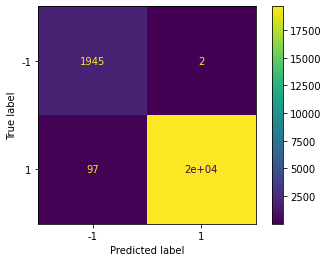

In [92]:
cm = confusion_matrix(y_train.iloc[80000:]['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [93]:
y_pred = clf.predict(np.array(_0_count_test))
val=y_pred-y_test['是否离网'].to_numpy()
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

99.50629224350251

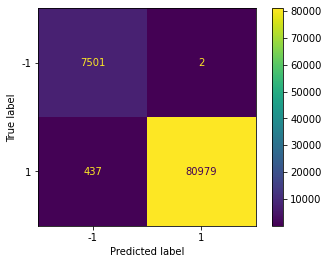

In [94]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()